In [135]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix


In [136]:
df=pd.read_csv('student_performance_dataset.csv')

df_co=df.copy()
# df_co.head()

df_co.drop(['Student_ID','Gender','Parental_Education_Level'],axis=1,inplace=True)
df_co.head()


,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,31,68.267841,86,Yes,Yes,63,Pass
1,16,78.222927,73,No,No,50,Fail
2,21,87.525096,74,Yes,No,55,Fail
3,27,92.076483,99,No,No,65,Pass
4,37,98.655517,63,No,Yes,70,Pass


In [137]:
df_co.info()
df_co.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Study_Hours_per_Week        708 non-null    int64  
 1   Attendance_Rate             708 non-null    float64
 2   Past_Exam_Scores            708 non-null    int64  
 3   Internet_Access_at_Home     708 non-null    object 
 4   Extracurricular_Activities  708 non-null    object 
 5   Final_Exam_Score            708 non-null    int64  
 6   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 38.8+ KB


Study_Hours_per_Week          0
Attendance_Rate               0
Past_Exam_Scores              0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Final_Exam_Score              0
Pass_Fail                     0
dtype: int64

In [138]:
oenc=OrdinalEncoder()
df_co[['Internet_Access_at_Home','Extracurricular_Activities','Pass_Fail']]=oenc.fit_transform(df_co[['Internet_Access_at_Home','Extracurricular_Activities','Pass_Fail']])
df_co.head()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,31,68.267841,86,1.0,1.0,63,1.0
1,16,78.222927,73,0.0,0.0,50,0.0
2,21,87.525096,74,1.0,0.0,55,0.0
3,27,92.076483,99,0.0,0.0,65,1.0
4,37,98.655517,63,0.0,1.0,70,1.0


In [139]:
scaler = StandardScaler()
df_co[['Study_Hours_per_Week','Past_Exam_Scores','Attendance_Rate']]=scaler.fit_transform(df_co[['Study_Hours_per_Week','Past_Exam_Scores','Attendance_Rate']])
df_co.head()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,0.548640,-0.713394,0.564773,1.0,1.0,63,1.0
1,-1.142177,0.008352,-0.338471,0.0,0.0,50,0.0
2,-0.578571,0.682762,-0.268991,1.0,0.0,55,0.0
3,0.097755,1.012739,1.468017,0.0,0.0,65,1.0
4,1.224966,1.489721,-1.033274,0.0,1.0,70,1.0


In [140]:
X=df_co[['Study_Hours_per_Week','Attendance_Rate','Past_Exam_Scores','Internet_Access_at_Home','Extracurricular_Activities']]
y=df_co[['Final_Exam_Score','Pass_Fail']]


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

model=MultiOutputRegressor(RandomForestRegressor())
model.fit(X_train,y_train)

y_pred = model.predict(X_test)


print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))



1.207394366197183
5.143606807511737
0.73061374837747


In [141]:
y2=df_co[['Pass_Fail']]
X_train,X_test,y2_train,y2_test=train_test_split(X,y2,test_size=0.30,random_state=42)
model2=LogisticRegression()
model2.fit(X_train,y2_train)

y2_pred=model2.predict(X_test)

print(classification_report(y2_test,y2_pred))
print(confusion_matrix(y2_test,y2_pred))


              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       108
         1.0       0.82      0.82      0.82       105

    accuracy                           0.82       213
   macro avg       0.82      0.82      0.82       213
weighted avg       0.82      0.82      0.82       213

[[89 19]
 [19 86]]


C:\Users\User 1\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


fit_transform() computes the mean and standard deviation from the input itself.

when input only have one row the standard deviation is 0  all values become weird (like -0.25).

In [142]:

study_hours = float(input("Enter Study Hours per Week: "))
attendance = float(input("Enter Attendance Rate: "))
past_score = float(input("Enter Past Exam Score: "))
internet = int(input("Internet Access at Home? 1=Yes// 0=No: "))
extracurricular = int(input("Extracurricular Activities? 1=Yes // 0=No: "))


df_num = pd.DataFrame([[study_hours, past_score, attendance]], columns=['Study_Hours_per_Week','Past_Exam_Scores','Attendance_Rate'])

df_num_scaled = scaler.transform(df_num)

df2 = pd.DataFrame(np.hstack([df_num_scaled, [[internet, extracurricular]]]), columns=X.columns)

# Predict
final_score = model.predict(df2)[0][0]
pass_fail = model2.predict(df2)[0]

# Display
print(f"Predicted Final Score: {final_score:.2f}")
print(f"Predicted Pass/Fail: {'Pass' if pass_fail == 1 else 'Fail'}")


Predicted Final Score: 52.42
Predicted Pass/Fail: Fail


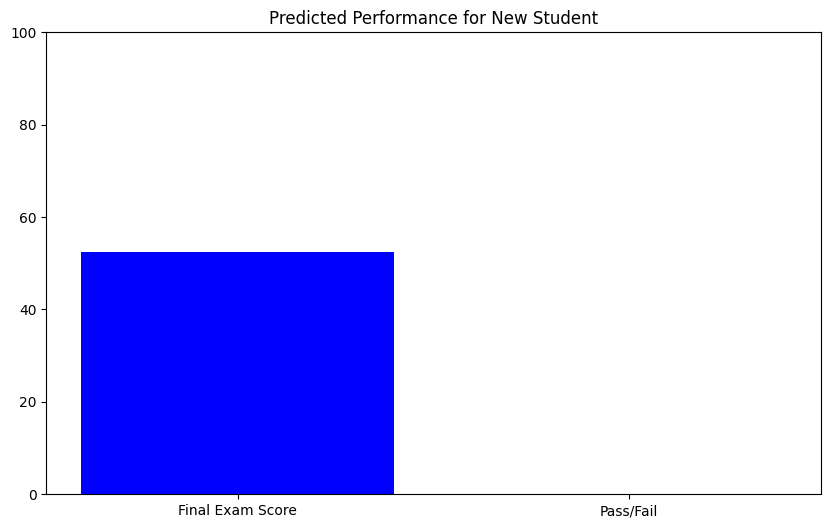

In [143]:
lables=['Final Exam Score', 'Pass/Fail']
value=[final_score,pass_fail*100]

plt.figure(figsize=(10,6))
plt.bar(lables,value,color=['blue', 'red'])
plt.ylim(0, 100)
plt.title('Predicted Performance for New Student')
plt.show()

